# COGS 108 - Final Project - Color and Price

## Video Presentation

https://drive.google.com/file/d/15ao2bSouN7aQQmfrocxhivAFSWGrxmpV/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In this project, we would like to find the relationship between used cars' colors and prices. Although color is not the main factor that determines a used car's price, we are still interested in if the color is impacting used car's price in different ways.


We first did data cleaning to filtered out clean California used car data. Then we did EDA on how different aspects of the car, such as body type, make, milegae, together with color is impacting a used car's price. In the first part of our inferential analysis, we did OLS regression on price and colors of our whole dataset，as well as the 50-top-selling models and found out that colors is impacting different models in various ways. In the second part of our inferential analysis, we classified the color data into rare color and common color and performed t-tests between them by top selling models in 9 different body type. In the end, we conclude that rare color overall has a negative correlation with most of the car, but a positive relationship with top-5-selling coupe.

# Names

- Meijiang Shen
- Yunze Xie
- Hongfei Lyu
- Zijian Sheng

<a id='research_question'></a>
# Research Question

How do variation in color affect used cars' price differently in California? We defined used car as the cars who has mileage greater than 50.

## Background and Prior Work
#### Introduction: 
The U.S. is one of the largest car markets in the world, with over 15 million new vehicles sold in the last year. However, the used car market is even larger, at 39 million cars sold. The year of manufacture of these used cars ranges widely from old classic cars to almost new dealer certified cars. The body of the cars is various as well, including supercars, minivans, SUVs, convertibles, etc. Moreover, all these varieties can make a difference in the selling price of the car and their market power. Although we already know model, mileage and year are the most important factors that affect the value of a used car because it is the most obvious factor related to the car’s condition. There are many factors that are much more disguised and obscure. In our study, we are attempting to find how one of those minor factor, color, will affect the value of a used car.

#### Prior Work:
There are many studies that have been conducted before about what factors is impacting a used car's value. For example, a recent 2021 Credit Karma(1) analysis by Dana Dratch shows how depreciation affects a car’s value. In this article, age and mileage were stated as the two biggest factors. The average miles driven per year is around 13,500 on average for American drivers, and above that means high mileage and below that means low mileage. With that being considered, a 5-year-old car should have 67,500 miles on them and they would lose 60% of the value. The article also stated some other factors such as the high mileage threshold is much lower for exotic sports cars, and luxury cars tend to depreciate faster than average. Moreover, there are also outside factors that can affect the value of the car. Such as demand and supply, location of the car, and whether a newer version of the same model is launched in the same year. 

Further, in the article “How Car Color Affects Resale Value” by Evelyn Kanter(2), the author briefly talks about how the choice of color could have impact on cars' resale value. For example, the author mentions that cars with color gold depreciated faster than other color, and since it is eazier to find touch-up colors for dings for white car, it is easier to make a white car to have a good looking before the resale. However, this article mostly used the depreciation rate as evidence to assert that some colors is depreciating faster than some colors, but does not have a rigorious conclusion on how the color is impacting used car's value in different ways. This article gave us a general overview about how that the popularity of colors varies in different car models and how certain color is depreciating faster than other, which inspires us to further study the influences of color over price among different model in different body types.



References:
1. https://www.creditkarma.com/auto/i/how-car-depreciation-affects-value
2. https://cars.usnews.com/cars-trucks/best-cars-blog/2016/08/how-car-color-affects-resale-value

# Hypothesis


We hypothesize that the used cars with rare exterior colors will have a negative correlation with the car’s price, because rare colors are less appealing to the majority and therefore decrease the demand and the price of the used car.

# Dataset(s)

- Dataset Name: U.S. Used Cars Info
- Link to the dataset: https://www.kaggle.com/ananaymital/us-used-cars-dataset
- Number of observations: 3,000,000

This dataset was scrapped from a used car website call Cargurus in September 2020. It collected 3 million real world used cars’ details in the U.S. The raw data has 66 columns in total, including: VINs, days on market, exterior color, year of manufacture, engine displacement, make, and etc. Since this dataset is sufficiently large and comprehensive in variables, so we will mainly use this dataset to determin the answer for our research question.

# Setup

In [139]:
# Install packages
!pip install opendatasets

## Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import opendatasets as od
import matplotlib.pyplot as plt
import matplotlib.style as style
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

style.use('fivethirtyeight') 

# Data Cleaning

We first use opendatasets package to download data from Kaggle with the link of that dataset, and then read in that dataset as a csv file and store it as df_raw. This is our raw data.

In [4]:
## Get data from Kaggle
od.download("https://www.kaggle.com/ananaymital/us-used-cars-dataset")
## Read in the downloaded csv file
df_raw = pd.read_csv('./us-used-cars-dataset/used_cars_data.csv',dtype={'dealer_zip': str})

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zijian0705
Your Kaggle Key: ········


  0%|          | 1.00M/2.13G [00:00<04:19, 8.83MB/s]

100%|██████████| 2.13G/2.13G [04:04<00:00, 9.35MB/s]


We then dropped the duplicated data (we identify duplicated data as the data with the same vin number) , and then dropped the columns that are unrelated to our research question, such as the leg space in the second row of the car.

In [5]:
## Count the number of observations in our dataframe and the number of duplicated observations in our dataset.
print(df_raw.duplicated().sum())
print(len(df_raw))
df_raw.drop_duplicates(inplace = True)

40
3000040


There are in total 40 duplicated data in our dataframe. After deleting the duplicates and we now have 3,000,000 observations in total. We also dropped the columns that are unrelated to our research question, such as the leg space in the second row of the car.

In [6]:
## Keep the varibales that we are interested
df = df_raw[['body_type',
             'dealer_zip','engine_displacement',
             'horsepower','listing_color',
             'make_name','mileage','model_name','price'
             ,'year']]
df.head()

,body_type,city,dealer_zip,engine_displacement,horsepower,listing_color,make_name,mileage,model_name,price,year
0,SUV / Crossover,Bayamon,00960,1300.0,177.0,YELLOW,Jeep,7.0,Renegade,23141.0,2019
1,SUV / Crossover,San Juan,00922,2000.0,246.0,BLACK,Land Rover,8.0,Discovery Sport,46500.0,2020
2,Sedan,Guaynabo,00969,2500.0,305.0,UNKNOWN,Subaru,NaN,WRX STI,46995.0,2016
3,SUV / Crossover,San Juan,00922,3000.0,340.0,GRAY,Land Rover,11.0,Discovery,67430.0,2020
4,SUV / Crossover,San Juan,00922,2000.0,246.0,BLACK,Land Rover,7.0,Discovery Sport,48880.0,2020


We then change column names into readable and straight-forward ones.

In [7]:
df = df.rename(columns={'body_type': 'type', 'dealer_zip': 'zip','listing_color': 'color','make_name': 'make','model_name': 'model'})
df.head()

,type,city,zip,engine_displacement,horsepower,color,make,mileage,model,price,year
0,SUV / Crossover,Bayamon,00960,1300.0,177.0,YELLOW,Jeep,7.0,Renegade,23141.0,2019
1,SUV / Crossover,San Juan,00922,2000.0,246.0,BLACK,Land Rover,8.0,Discovery Sport,46500.0,2020
2,Sedan,Guaynabo,00969,2500.0,305.0,UNKNOWN,Subaru,NaN,WRX STI,46995.0,2016
3,SUV / Crossover,San Juan,00922,3000.0,340.0,GRAY,Land Rover,11.0,Discovery,67430.0,2020
4,SUV / Crossover,San Juan,00922,2000.0,246.0,BLACK,Land Rover,7.0,Discovery Sport,48880.0,2020


Now we are left with 3,000,000 unique data with 11 variables that are, we believed, related to our research quetstion. Those variables are type, zip, engine displacement, horsepower, color, make, mileage, model, price, year.

We also want to drop the observations with missing values. Since the data is gathered from used car website, and all the information is uploaded by the owner or dealer. The spread of these missing data should be random and not caused by confounding variable. For example, ideally each color would have about the same portion of missing observations.

In [8]:
df = df.dropna()
len(df)

2695622

In [9]:
for (columnName, columnData) in df.iteritems():
    n = len(pd.unique(df[columnName]))
    print("Number of unique values in this column:",n,'\n', "(Some examples are :", df[columnName].unique()[:10], ")")

Number of unique values in this column: 9 
 (Some examples are : ['SUV / Crossover' 'Sedan' 'Coupe' 'Pickup Truck' 'Wagon' 'Minivan'
 'Hatchback' 'Van' 'Convertible'] )
Number of unique values in this column: 4682 
 (Some examples are : ['Bayamon' 'San Juan' 'Guaynabo' 'Bay Shore' 'Bronx' 'Woodbury' 'Linden'
 'East Hartford' 'Bohemia' 'Little Ferry'] )
Number of unique values in this column: 8225 
 (Some examples are : ['00960' '00922' '00969' '11706' '10466' '11797' '07036' '06108' '11716'
 '07643'] )
Number of unique values in this column: 67 
 (Some examples are : [1300. 2000. 3000. 2500. 1700. 1600. 1500. 3500. 3600. 2400.] )
Number of unique values in this column: 455 
 (Some examples are : [177. 246. 340. 247. 186. 296. 237. 320. 148. 254.] )
Number of unique values in this column: 15 
 (Some examples are : ['YELLOW' 'BLACK' 'GRAY' 'UNKNOWN' 'SILVER' 'WHITE' 'RED' 'BLUE' 'ORANGE'
 'BROWN'] )
Number of unique values in this column: 64 
 (Some examples are : ['Jeep' 'Land Rover' 'M

Now we want to see if there are any anomalies left in selected dataset. For example, something like integers that appeared in the string categories. There seems to be nothing wrong above, but we will perform a more detailed examiniation by outputting the unique values as csv files.

In [10]:
for (columnName, columnData) in df.iteritems():
    pd.DataFrame( df[columnName].unique()).to_csv(f'{columnName}.csv', index=False, header=False) 

After thorough examination, we found that all columns are normal except the zip column, it contains string variables like XXXXX-XXXX. We are only interested in used veichles that are in California, which we will select using zipcodes as 5-digit integers. The Californian zipcodes range from 90001 to 96162, so anything beyond this range will be removed. We only need the first 5 digit zipcodes without the dash and the later 4 digits, so we create this function to keep only the first 5 digits of the zip code. We read this zip column as string at the beginning because we can not substring the first 5 characters from an integer.(ie 910001234)

In [11]:
def toint(num):
    num = num[:5]
    num = int(num)
    return num

df.zip = df.zip.apply(toint)

In [12]:
def calzip(num):   
    if ((num >= 90001) and (num <= 96162)):
        return num
    else:
        return None
    
df.zip = df.zip.apply(calzip)

dfcal = df.dropna()

Since our report is focusing on the effects of color on the used car price, we cannot utilize the observations with unknown color variable and analyze them. So we dropped all the observations with unknown color.

In [13]:
dfcal = dfcal[dfcal['color'] != 'UNKNOWN']

And because we only want to investiage used cars. So we are also dropping cars that has mileage less than 50, because that means the veichle is most likely to be new.

In [14]:
dfcal.drop(dfcal[dfcal['mileage'] <= 50].index, inplace = True)

In [15]:
dfcal.describe()

,zip,engine_displacement,horsepower,mileage,price,year
count,125565.000000,125565.000000,125565.000000,125565.000000,1.255650e+05,125565.000000
mean,93068.281989,2804.615936,237.409700,48371.921690,2.439207e+04,2016.227078
std,1686.860319,1218.957982,89.273291,40254.463006,2.173658e+04,3.727314
min,90001.000000,700.000000,69.000000,51.000000,9.990000e+02,1981.000000
25%,91784.000000,2000.000000,170.000000,22305.000000,1.487100e+04,2015.000000
50%,92688.000000,2400.000000,223.000000,35536.000000,1.999800e+04,2017.000000
75%,94568.000000,3500.000000,290.000000,65112.000000,2.947600e+04,2019.000000
max,96150.000000,8300.000000,1001.000000,389009.000000,2.749950e+06,2021.000000


Now we are left with a dataset with 125565 observations that contain only Californian veichles with colors registered, and it will be ready for later analysis.

In [16]:
dfcal.to_csv('cleaned_used_car_cali.csv')

Since the original dataset is too big to read from. We saved the cleaned dataset into a csv file, so we could manipulate the data more efficiently in out futher analysis.

# Data Analysis & Results

## Explorary Data Analysis (EDA)

First let us read from the cleaned csv file from last time, and drop the first column because that was the index from the original dataset. We do not need the old indexes and we will assign new index to the dataset.

In [5]:
dfcal = pd.read_csv('cleaned_used_car_cali.csv', header = 0)
# Drop the first column because that is the index from the old csv file
dfcal = dfcal.drop(columns = 'Unnamed: 0')
dfcal.head()

,type,city,zip,engine_displacement,horsepower,color,make,mileage,model,price,year,log_price,log_mileage
0,Sedan,San Jose,95111.0,1600.0,109.0,BLACK,Nissan,35042.0,Versa,12990.0,2019,13.665114,15.096797
1,SUV / Crossover,Bakersfield,93309.0,2500.0,197.0,RED,Buick,32420.0,Envision,18990.0,2017,14.212952,14.984596
2,SUV / Crossover,Santa Fe Springs,90670.0,3500.0,284.0,RED,Nissan,17389.0,Pathfinder,31990.0,2019,14.965333,14.085887
3,SUV / Crossover,Fresno,93721.0,1600.0,139.0,GRAY,Kia,30184.0,Niro,16990.0,2017,14.052398,14.881496
4,SUV / Crossover,San Jose,95111.0,2000.0,235.0,RED,Lexus,17354.0,NX,31590.0,2019,14.947180,14.082981


First, we want to explore the numerical variables in our datasets and how they are related to each other. We plot a scatter matrix to take a look at all our numerical values, which are, mileage, price, engine_displacement, and horsepower.

<Figure size 1080x864 with 0 Axes>

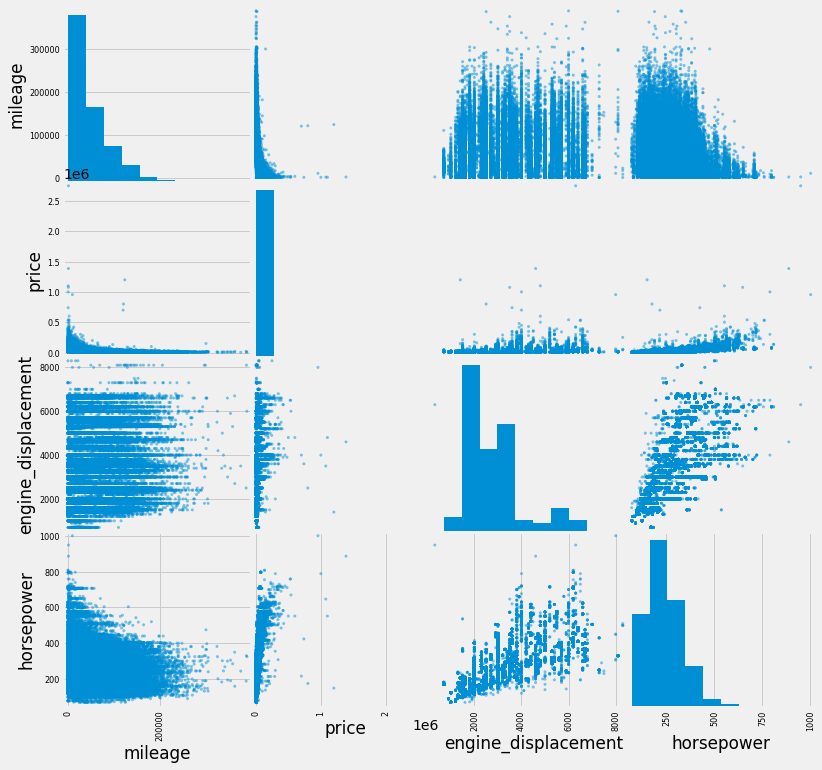

In [6]:
fig = plt.figure(figsize =(15, 12))
fig = pd.plotting.scatter_matrix(dfcal[['mileage', 'price',
                                         'engine_displacement', 'horsepower']],
                                 figsize = [12, 12])

From the graph, we observed that the distribution of price is extremely skewed to the right. Also, mileage, engine displacement, and horsepower are skewed: mileage are skewed to the right; engine displacement and horsepower are skewed to the left. We also observed there are outliers in our data in terms of mileage, price, and horsepower. However, we should not eliminate those outliers since they are the real-world used cars data and they are not recored by mistakes.

To make our analysis and statistical result more intepretable, we use log transformation in price variable and then use the log-transformed price data for future analysis.

<Figure size 576x576 with 0 Axes>

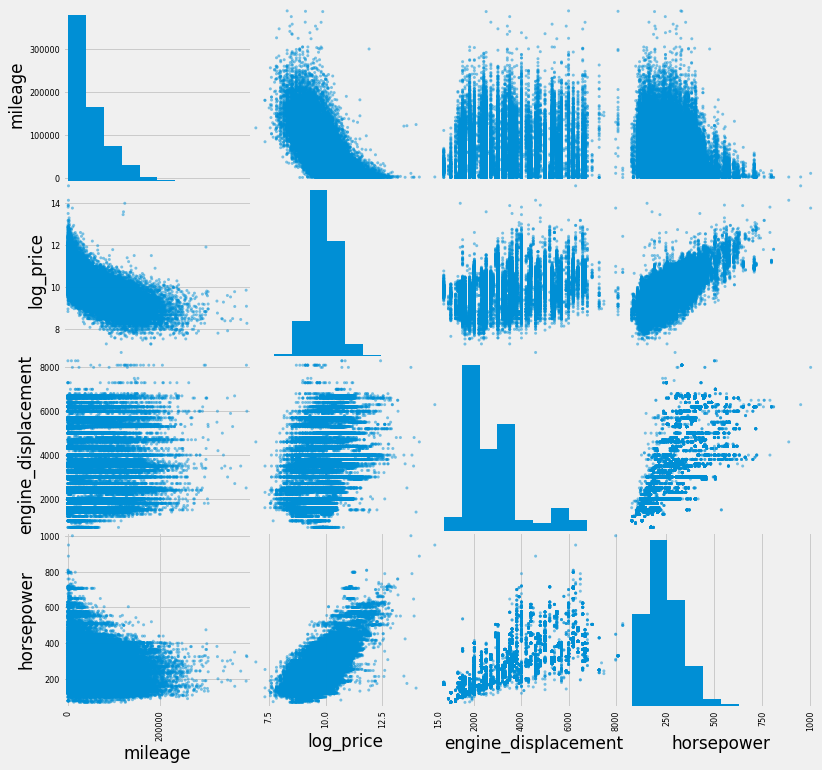

In [7]:
dfcal['log_price'] = np.log(dfcal['price'])
dfcal['log_mileage'] = np.log(dfcal['mileage'])
fig = plt.figure(figsize =(8, 8))
fig = pd.plotting.scatter_matrix(dfcal[['mileage', 'log_price',
                                         'engine_displacement', 'horsepower']],
                                 figsize = [12, 12])

After the log transformation, the relationship between numerical variables become more intepretable. From this scatter matrix, we can observe some relationships among those variables. There are some outliers in the log-transformed mielage distribution. We can see there are some used cars with really low mileage appear in our dataset. Still, they are the real-world data and they are not recorded by mistakes so we will keep them in our dataset. We can see there is a negative correlation between log price and mileage, a weak positive correlation between log price and engine_displacement, a relatively strong correlation between log price and horsepower, a postive and heteroscedastic correlation between engine_displacement and horsepower.



In [8]:
dfcal.describe()

,zip,engine_displacement,horsepower,mileage,price,year,log_price,log_mileage
count,125565.000000,125565.000000,125565.000000,125565.000000,1.255650e+05,125565.000000,125565.000000,125565.000000
mean,93068.281989,2804.615936,237.409700,48371.921690,2.439207e+04,2016.227078,9.927703,10.328585
std,1686.860319,1218.957982,89.273291,40254.463006,2.173658e+04,3.727314,0.570858,1.269068
min,90001.000000,700.000000,69.000000,51.000000,9.990000e+02,1981.000000,6.906755,3.931826
25%,91784.000000,2000.000000,170.000000,22305.000000,1.487100e+04,2015.000000,9.607168,10.012566
50%,92688.000000,2400.000000,223.000000,35536.000000,1.999800e+04,2017.000000,9.903388,10.478302
75%,94568.000000,3500.000000,290.000000,65112.000000,2.947600e+04,2019.000000,10.291332,11.083864
max,96150.000000,8300.000000,1001.000000,389009.000000,2.749950e+06,2021.000000,14.827093,12.871358


We then want to show how the color and categorical data in our dataset are correlated.

We made a bar-plot showing the difference in average prices among different colors to have a rough idea about how the used cars' color are related to their average price.

<BarContainer object of 14 artists>

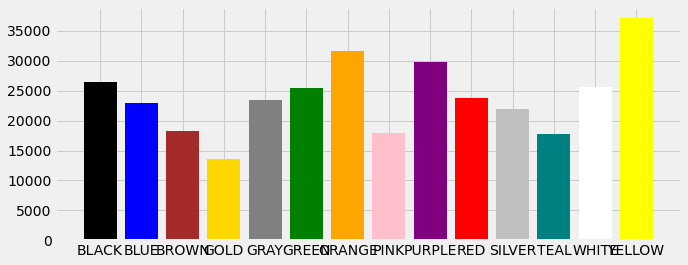

In [9]:
df_color = pd.DataFrame(dfcal.groupby('color')['price'].describe())
df_color = df_color.reset_index()
df_color
fig = plt.figure(figsize =(10, 4))
color = df_color['color'].tolist()
price = df_color['mean'].tolist()
plt.bar(color, price, color = color)

We can directly observe that the used cars in “yellow” have the highest average prices which is reasonable with the fact that many luxury cars are in yellow; we also observed that the used cars in “gold” have the lowest average prices which may require furture investigation.

We also made graphs for the log prices distributions within each different color because the average price bar graph is unable to tell us the distribution of cars price among different colors.

In [10]:
df_blue = dfcal[dfcal.color == 'BLUE' ]
df_black = dfcal[dfcal.color == 'BLACK' ]
df_red = dfcal[dfcal.color == 'RED' ]
df_gray = dfcal[dfcal.color == 'GRAY' ]
df_silver = dfcal[dfcal.color == 'SILVER' ]
df_white = dfcal[dfcal.color == 'WHITE' ]
df_orange = dfcal[dfcal.color == 'ORANGE' ]
df_brown = dfcal[dfcal.color == 'BROWN' ]
df_green = dfcal[dfcal.color == 'GREEN' ]
df_yellow = dfcal[dfcal.color == 'YELLOW' ]
df_gold = dfcal[dfcal.color == 'GOLD' ]
df_purple = dfcal[dfcal.color == 'PURPLE' ]
df_teal = dfcal[dfcal.color == 'TEAL' ]
df_pink = dfcal[dfcal.color == 'PINK' ]

Text(0.5, 1.0, 'gray')

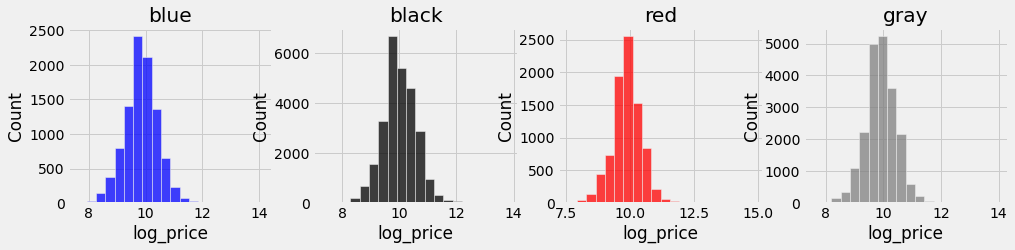

In [11]:
fig, axs = plt.subplots(ncols=4, figsize = (15, 3) )
sns.histplot(df_blue['log_price'], bins = 20, ax = axs[0], color = 'blue')
sns.histplot(df_black['log_price'], bins = 20, ax = axs[1], color = 'black')
sns.histplot(df_red['log_price'], bins = 20, ax = axs[2], color = 'red')
sns.histplot(df_gray['log_price'], bins = 20, ax = axs[3], color = 'gray')
axs[0].set_title('blue')
axs[1].set_title('black')
axs[2].set_title('red')
axs[3].set_title('gray')

Text(0.5, 1.0, 'brown')

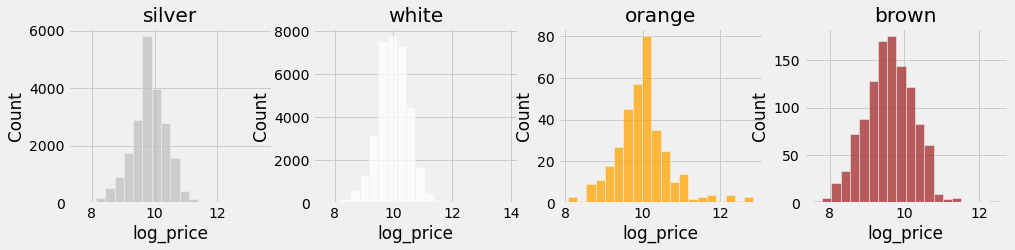

In [12]:
fig, axs = plt.subplots(ncols=4, figsize = (15, 3) )
sns.histplot(df_silver['log_price'], bins = 20, ax = axs[0], color = 'silver')
sns.histplot(df_white['log_price'], bins = 20, ax = axs[1], color = 'white')
sns.histplot(df_orange['log_price'], bins = 20, ax = axs[2], color = 'orange')
sns.histplot(df_brown['log_price'], bins = 20, ax = axs[3], color = 'brown')
axs[0].set_title('silver')
axs[1].set_title('white')
axs[2].set_title('orange')
axs[3].set_title('brown')

Text(0.5, 1.0, 'purple')

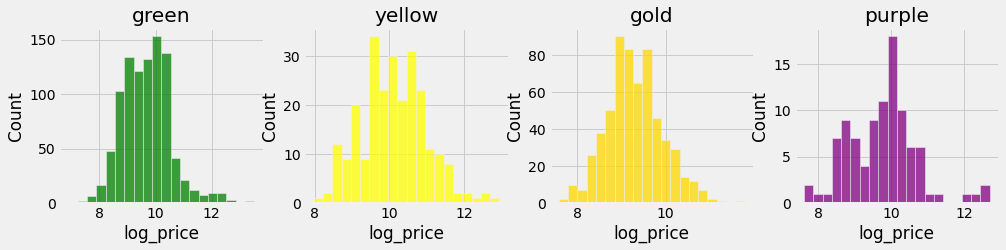

In [13]:
fig, axs = plt.subplots(ncols=4, figsize = (15, 3) )
sns.histplot(df_green['log_price'], bins = 20, ax = axs[0], color = 'green')
sns.histplot(df_yellow['log_price'], bins = 20, ax = axs[1], color = 'yellow')
sns.histplot(df_gold['log_price'], bins = 20, ax = axs[2], color = 'gold')
sns.histplot(df_purple['log_price'], bins = 20, ax = axs[3], color = 'purple')
axs[0].set_title('green')
axs[1].set_title('yellow')
axs[2].set_title('gold')
axs[3].set_title('purple')

Text(0.5, 1.0, 'pink')

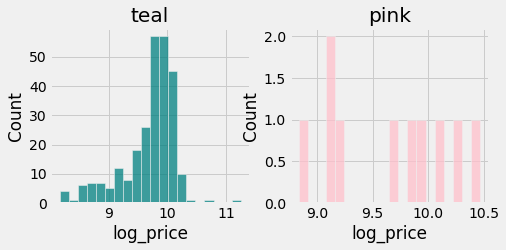

In [14]:
fig, axs = plt.subplots(ncols=2, figsize = (7, 3) )
sns.histplot(df_teal['log_price'], bins = 20, ax = axs[0], color = 'teal')
sns.histplot(df_pink['log_price'], bins = 20, ax = axs[1], color = 'pink')
axs[0].set_title('teal')
axs[1].set_title('pink')

From those histograms of log-price of used cars of different colors, we observe that most of the colors have a normal log-price distribution. Orange and purple cars's log price distributions have some outliers on the right,possibly because that large number of super cars are in those two colors. Teal car's log price are skewed to the left with some outliers on the right. Noticably, there are only 10 pink car sample in our dataset so the analysis on how color pink affect the price of a used car might be hard and biased due to the lack of sample.

For categorical data make and model, since there are too many distinct models in different make and we cannot make a graph for every one of them, we will take a look at top 5 most common models and their color and price.

In [15]:
# Top 50 most common models and their price statistics
most_selling = dfcal.groupby('model')['price'].describe().reset_index()
most_selling = most_selling.sort_values(['count'], ascending = False)
most_selling.head(50)

,model,count,mean,std,min,25%,50%,75%,max
218,Corolla,3301.0,15373.953650,3751.707971,1490.0,13799.00,15988.0,17821.00,27000.0
196,Civic,3175.0,16570.817638,4296.053602,1900.0,14897.50,17424.0,19000.00,28954.0
177,Camry,3019.0,18485.593740,5802.260849,2000.0,15282.50,19293.0,22080.50,37182.0
89,Accord,2531.0,19101.854994,5954.317703,1500.0,15799.50,19596.0,23540.00,38220.0
714,Sentra,2129.0,13238.766557,3118.413073,1900.0,11399.00,13699.0,14999.00,25250.0
100,Altima,2009.0,16653.395470,18085.907517,1999.0,13181.00,16988.0,18998.00,799900.0
305,F-150,2006.0,33517.385842,13727.446008,4900.0,24999.00,33803.0,39781.50,179999.0
8,3 Series,1919.0,23399.199031,10738.931071,3150.0,14995.00,22995.0,28403.50,70305.0
730,Silverado 1500,1644.0,33389.739051,10329.220569,4995.0,26495.00,33999.5,39995.00,63999.0
299,Explorer,1617.0,28846.297464,10284.479087,1988.0,22999.00,27944.0,32870.00,62505.0


The statistics above demonstrates that the most common models are mostly more economic cars, hence lower in price. For example, the top 5 most common cars all have average lower than $20,000.


[Text(0.5, 0, 'Sentra'), Text(0, 0.5, '')]

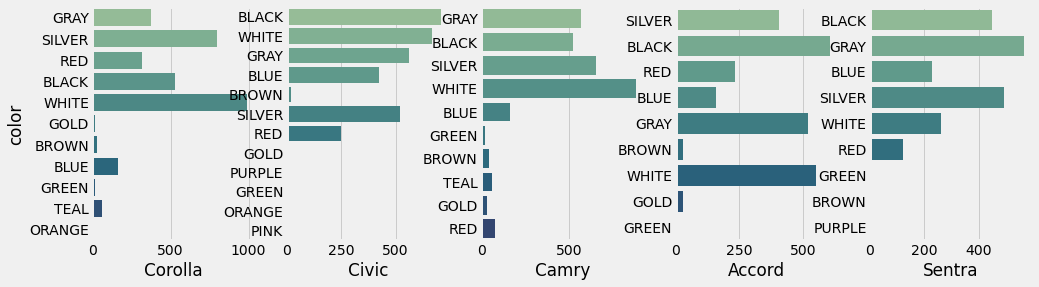

In [16]:
Corolla_color = dfcal[dfcal['model'] == 'Corolla']
Civic_color = dfcal[dfcal['model'] == 'Civic']
Camry_color = dfcal[dfcal['model'] == 'Camry']
Accord_color = dfcal[dfcal['model'] == 'Accord']
Sentra_color = dfcal[dfcal['model'] == 'Sentra']


fig, axs = plt.subplots(ncols=5, figsize = (15, 4) )
sns.countplot( y='color', data=Corolla_color, palette = 'crest', ax = axs[0])
sns.countplot( y='color', data=Civic_color, palette = 'crest', ax = axs[1])
sns.countplot( y='color', data=Camry_color, palette = 'crest', ax = axs[2])
sns.countplot( y='color', data=Accord_color, palette = 'crest', ax = axs[3])
sns.countplot( y='color', data=Sentra_color, palette = 'crest', ax = axs[4])

axs[0].set(xlabel='Corolla', ylabel='color')
axs[1].set(xlabel='Civic', ylabel='')
axs[2].set(xlabel='Camry', ylabel='')
axs[3].set(xlabel='Accord', ylabel='')
axs[4].set(xlabel='Sentra', ylabel='')

From the countplot above, we can observe that the most common colors in those models are white, black, silver, gray; colors such as red and blue are common in some models but not others.

This pattern is only valid for economical sedans, we will investigate other types in our furture analysis.

Now we want to explore how the veichles' body type are correlated with color and price. We partition our data by their body type and then compare the average prices by colors.

In [17]:
df_coupe = dfcal[dfcal.type == 'Coupe' ]
df_sedan = dfcal[dfcal.type == 'Sedan' ]
df_suv = dfcal[dfcal.type == 'SUV / Crossover' ]
df_minivan = dfcal[dfcal.type == 'Minivan' ]
df_pickup = dfcal[dfcal.type == 'Pickup Truck' ]
df_hatchback = dfcal[dfcal.type == 'Hatchback' ]
df_wagon = dfcal[dfcal.type == 'Wagon' ]
df_convertible = dfcal[dfcal.type == 'Convertible' ]
df_van = dfcal[dfcal.type == 'Van' ]

[Text(0.5, 0, 'price for SUVs'), Text(0, 0.5, '')]

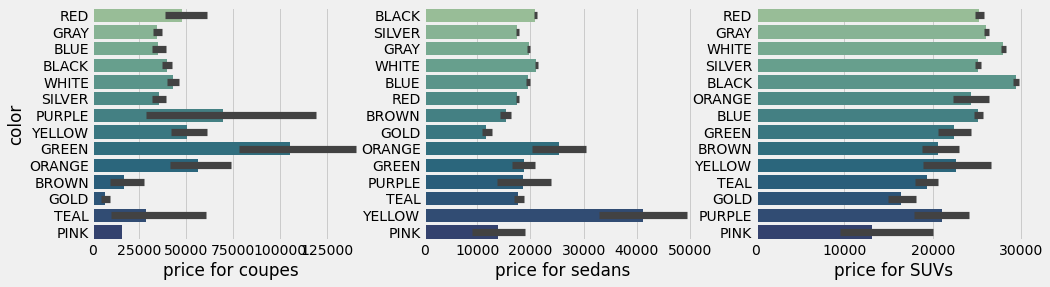

In [18]:
fig, axs = plt.subplots(ncols=3, figsize = (15, 4) )
sns.barplot(y='color', x='price', data=df_coupe, palette = 'crest', ax = axs[0])
sns.barplot(y='color', x='price', data=df_sedan, palette = 'crest', ax = axs[1])
sns.barplot(y='color', x='price', data=df_suv, palette = 'crest', ax = axs[2])
axs[0].set(xlabel='price for coupes', ylabel='color')
axs[1].set(xlabel='price for sedans', ylabel='')
axs[2].set(xlabel='price for SUVs', ylabel='')

[Text(0.5, 0, 'price for hatchbacks'), Text(0, 0.5, '')]

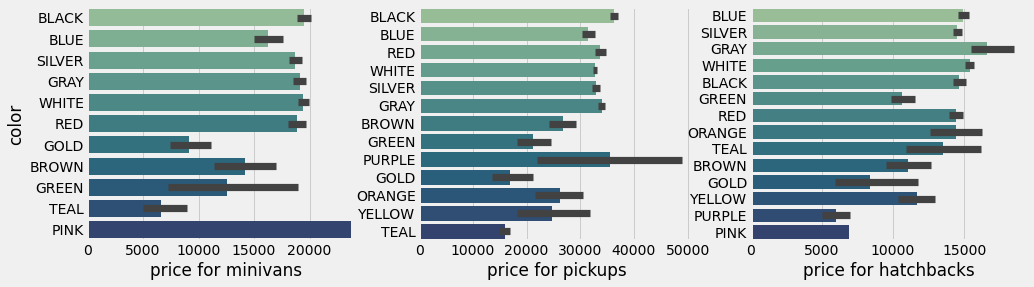

In [19]:
fig, axs = plt.subplots(ncols=3, figsize = (15, 4) )
sns.barplot(y='color', x='price', data=df_minivan, palette = 'crest', ax = axs[0])
sns.barplot(y='color', x='price', data=df_pickup, palette = 'crest', ax = axs[1])
sns.barplot(y='color', x='price', data=df_hatchback, palette = 'crest', ax = axs[2])
axs[0].set(xlabel='price for minivans', ylabel='color')
axs[1].set(xlabel='price for pickups', ylabel='')
axs[2].set(xlabel='price for hatchbacks', ylabel='')

[Text(0.5, 0, 'price for vans'), Text(0, 0.5, '')]

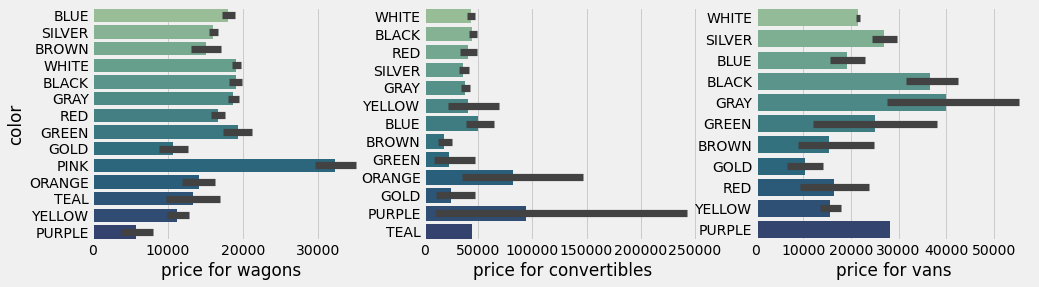

In [20]:
fig, axs = plt.subplots(ncols=3, figsize = (15, 4) )
sns.barplot(y='color', x='price', data=df_wagon, palette = 'crest', ax = axs[0])
sns.barplot(y='color', x='price', data=df_convertible, palette = 'crest', ax = axs[1])
sns.barplot(y='color', x='price', data=df_van, palette = 'crest', ax = axs[2])
axs[0].set(xlabel='price for wagons', ylabel='color')
axs[1].set(xlabel='price for convertibles', ylabel='')
axs[2].set(xlabel='price for vans', ylabel='')

We can tell that for most of the more economical body type (SUV, hatchback, sedan, wagons, minivans) are cheaper with most of then under 20,000 dollars and SUV under 25,000 dollars.The utility/commercial veichles (pickups and vans) are slight more expensive with most of them being under 30,000 dollars. Convertibles and coupes are much more expensive with the average of around 50,000 dollars.

The body types also shows a pattern in color and price. For example, rare/exotic colors are much more expensive for coupes and convertibles. However, common/ordinary colors are more expensive than rare/exotic colors for economical veichles. This pattern is even more obvious with utility/commercial veichles.

From the EDAs above, we have a general overview of how numerical and categorical varibales are intercorrelated.

## Inferential Data Analysis

We first run a linear regression model on the log price and color of the car.

In [21]:
# Linear regression between log price and color
outcome_color, predictors_color = patsy.dmatrices('log_price ~ color', dfcal)
mod_color = sm.OLS(outcome_color, predictors_color)
res_color = mod_color.fit()
print(res_color.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     245.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:48   Log-Likelihood:            -1.0620e+05
No. Observations:              125565   AIC:                         2.124e+05
Df Residuals:                  125551   BIC:                         2.126e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.0011      0.003   29

From the linear regression summary, we can see that the R-square is really small, which means color is not the main factor that affects the price of a used car.
So we put all parameters that we have into our regression model and observe what happened.

To avoid multicolinearity, we decide to keep only horse power and drop engine displacement. Because they are postively correlated. 

In [22]:
outcome, predictors = patsy.dmatrices('log_price ~ horsepower + color + mileage + model + year', dfcal)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1586.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:02   Log-Likelihood:                 51130.
No. Observations:              125565   AIC:                        -1.004e+05
Df Residuals:                  124655   BIC:                        -9.158e+04
Df Model:                         909                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

From the linear regression we ran above, we can conclude that model has a relatively stronger impact on the price of used cars, since most of the model has a p-value much less than 0.05 and its absolute values of coefficients are relatively high. 

Therefore, we need to control the model while doing our analysis. To do this, we pick the top 50 selling models and do linear regression on each of them.

In [23]:
dfcal['log_price'].describe()

count    125565.000000
mean          9.927703
std           0.570858
min           6.906755
25%           9.607168
50%           9.903388
75%          10.291332
max          14.827093
Name: log_price, dtype: float64

In [24]:
top_50 = dfcal.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(50)
top_50

,model,count,mean,std,min,25%,50%,75%,max
0,Corolla,3301.0,9.600315,0.311489,7.306531,9.532351,9.679594,9.788133,10.203592
1,Civic,3175.0,9.669299,0.334631,7.549609,9.608949,9.765604,9.852194,10.273464
2,Camry,3019.0,9.756411,0.410486,7.600902,9.634464,9.867498,10.002450,10.523580
3,Accord,2531.0,9.792954,0.395228,7.313220,9.667734,9.883081,10.066455,10.551114
4,Sentra,2129.0,9.456582,0.281848,7.549609,9.341281,9.525078,9.615739,10.136581
5,Altima,2009.0,9.648384,0.352447,7.600402,9.486532,9.740262,9.852089,13.592242
6,F-150,2006.0,10.328672,0.453616,8.496990,10.126591,10.428305,10.591157,12.100707
7,3 Series,1919.0,9.941422,0.515489,8.055158,9.615472,10.043032,10.254268,11.160598
8,Silverado 1500,1644.0,10.357472,0.366319,8.516193,10.184711,10.434101,10.596510,11.066623
9,Explorer,1617.0,10.199471,0.401197,7.594884,10.043206,10.237958,10.400316,11.043002


From the summary above, we found out that when we are looking at a specific model, the standard deviation of the log price price become less than the overall standard deviation of the log price. 

Therefore, the linear regression on each model would tell us more precisely how the different color of the used car is impacting the specific model.

In [25]:
def assort_data(model_name):
    model_name = dfcal[dfcal['model'] == model_name]
    return model_name

In [26]:
df_top50_model = top_50['model']
dict_of_model = {} 

for model in df_top50_model:
    dict_of_model[model] = assort_data(model)
    

In [27]:
def linear_model(model_name):
    import patsy
    import statsmodels.api as sm
    
    outcome, predictors = patsy.dmatrices('log_price ~ horsepower + color + mileage + year', model_name)
    model = sm.OLS(outcome, predictors)
    
    ## fit the model
    results = model.fit()

    ## look at the results
    print(results.summary())

In [28]:
for model in df_top50_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:03   Log-Likelihood:                 2278.9
No. Observations:                3301   AIC:                            -4530.
Df Residuals:                    3287   BIC:                            -4444.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -95.2335      2.137    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     626.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:03   Log-Likelihood:                 983.79
No. Observations:                1408   AIC:                            -1942.
Df Residuals:                    1395   BIC:                            -1873.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -104.4187      3.457    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     999.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:03   Log-Likelihood:                 917.46
No. Observations:                1184   AIC:                            -1809.
Df Residuals:                    1171   BIC:                            -1743.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -57.6042      3.160    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1063.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:04   Log-Likelihood:                 540.44
No. Observations:                 828   AIC:                            -1055.
Df Residuals:                     815   BIC:                            -993.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -114.0990      5.063    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.1
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          3.01e-262
Time:                        13:02:04   Log-Likelihood:                 460.60
No. Observations:                 747   AIC:                            -897.2
Df Residuals:                     735   BIC:                            -841.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -133.1836      7.911    -

We can see that the color is impacting different model differently.
The default color in our linear regression is black, and we are comparing all other color with black color.
When we looked at the summary, we focus on the color parameter that has a p-value smaller than 0.05 to have a significant difference.
For Corolla, we can conclude that blue, gray, silver, tead, and white corolla is likely to have a higher price than a black corolla.
For Civic, we can conclude that gold, and while civic is likely to have a higher price than a black civic, and green civic is likely to have a lower price than a black civic.
For Camry, we can conclude that a teal Camry is likely to have a higher price than a black Camry.
This list could go on and eventually we can draw a brief conclusion on those top 50 models. This regression also tells us that for different models, color is impacting the used car's price differently.

In [29]:
top_50

,model,count,mean,std,min,25%,50%,75%,max
0,Corolla,3301.0,9.600315,0.311489,7.306531,9.532351,9.679594,9.788133,10.203592
1,Civic,3175.0,9.669299,0.334631,7.549609,9.608949,9.765604,9.852194,10.273464
2,Camry,3019.0,9.756411,0.410486,7.600902,9.634464,9.867498,10.002450,10.523580
3,Accord,2531.0,9.792954,0.395228,7.313220,9.667734,9.883081,10.066455,10.551114
4,Sentra,2129.0,9.456582,0.281848,7.549609,9.341281,9.525078,9.615739,10.136581
5,Altima,2009.0,9.648384,0.352447,7.600402,9.486532,9.740262,9.852089,13.592242
6,F-150,2006.0,10.328672,0.453616,8.496990,10.126591,10.428305,10.591157,12.100707
7,3 Series,1919.0,9.941422,0.515489,8.055158,9.615472,10.043032,10.254268,11.160598
8,Silverado 1500,1644.0,10.357472,0.366319,8.516193,10.184711,10.434101,10.596510,11.066623
9,Explorer,1617.0,10.199471,0.401197,7.594884,10.043206,10.237958,10.400316,11.043002


However, some cars of the other body type are under represented, since most of the top selling models are sedan and SUVs. Car types like minivan, wagon, and convertibles are under represented. So we will redo the above regression with top 5 selling models in each body types. Including: coupe, sedan, SUV, minivan, pickup, hatchback, wagon, convertible, van.

In [30]:
top_coupe = df_coupe.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_coupe

,model,count,mean,std,min,25%,50%,75%,max
0,Mustang,788.0,10.062473,0.380992,8.293800,9.903438,10.126591,10.292120,11.406320
1,Challenger,668.0,10.269385,0.369681,9.209840,10.057568,10.235952,10.434094,11.813023
2,Camaro,556.0,10.096009,0.363463,9.209840,9.851549,10.085726,10.340524,11.123019
3,Civic Coupe,412.0,9.481839,0.456066,7.896925,9.196337,9.620549,9.820703,10.221759
4,911,267.0,11.366592,0.582592,9.840974,11.065669,11.365863,11.714992,13.512918


In [31]:
df_coupe_model = top_coupe['model']
dict_of_model = {} 

for model in df_coupe_model:
    dict_of_model[model] = assort_data(model)
for model in df_coupe_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     619.8
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:04   Log-Likelihood:                 732.33
No. Observations:                1196   AIC:                            -1437.
Df Residuals:                    1182   BIC:                            -1365.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -21.1180      2.869     

In [32]:
top_sedan = df_sedan.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_sedan

,model,count,mean,std,min,25%,50%,75%,max
0,Corolla,3301.0,9.600315,0.311489,7.306531,9.532351,9.679594,9.788133,10.203592
1,Civic,3167.0,9.668315,0.334418,7.549609,9.608781,9.764225,9.852194,10.273464
2,Camry,3019.0,9.756411,0.410486,7.600902,9.634464,9.867498,10.002450,10.523580
3,Accord,2531.0,9.792954,0.395228,7.313220,9.667734,9.883081,10.066455,10.551114
4,Sentra,2128.0,9.456872,0.281596,7.549609,9.341281,9.525078,9.615739,10.136581


In [33]:
df_sedan_model = top_sedan['model']
dict_of_model = {} 

for model in df_sedan_model:
    dict_of_model[model] = assort_data(model)
for model in df_sedan_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:05   Log-Likelihood:                 2278.9
No. Observations:                3301   AIC:                            -4530.
Df Residuals:                    3287   BIC:                            -4444.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -95.2335      2.137    -

In [34]:
top_suv = df_suv.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_suv

,model,count,mean,std,min,25%,50%,75%,max
0,Explorer,1617.0,10.199471,0.401197,7.594884,10.043206,10.237958,10.400316,11.043002
1,Rogue,1473.0,9.749408,0.273520,8.516193,9.665230,9.797460,9.903388,10.429251
2,Escape,1367.0,9.692457,0.361424,7.999343,9.532351,9.740674,9.902987,10.642205
3,RAV4,1328.0,9.906186,0.373697,8.077447,9.825391,9.989551,10.122352,11.512915
4,Wrangler Unlimited,1268.0,10.504481,0.193633,9.390743,10.433439,10.518403,10.591622,11.141847


In [35]:
df_suv_model = top_suv['model']
dict_of_model = {} 

for model in df_suv_model:
    dict_of_model[model] = assort_data(model)
for model in df_suv_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1821.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:05   Log-Likelihood:                 1285.8
No. Observations:                1617   AIC:                            -2548.
Df Residuals:                    1605   BIC:                            -2483.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -122.9750      3.560    -

In [36]:
top_minivan = df_minivan.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_minivan

,model,count,mean,std,min,25%,50%,75%,max
0,Grand Caravan,1177.0,9.644918,0.295060,7.860571,9.615672,9.740851,9.798016,10.714196
1,Sienna,779.0,9.874227,0.507701,8.004700,9.679719,10.038892,10.239335,10.770252
2,Odyssey,686.0,9.830795,0.573713,8.130059,9.469564,9.997706,10.300733,10.787565
3,Pacifica,341.0,10.062843,0.194412,9.463120,9.952182,10.025086,10.176982,10.804868
4,Town & Country,126.0,9.188600,0.378147,8.157657,8.974618,9.209990,9.433324,9.899881


In [37]:
df_minivan_model = top_minivan['model']
dict_of_model = {} 

for model in df_minivan_model:
    dict_of_model[model] = assort_data(model)
for model in df_minivan_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     469.2
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:05   Log-Likelihood:                 762.73
No. Observations:                1177   AIC:                            -1501.
Df Residuals:                    1165   BIC:                            -1441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -98.6456      5.445    -

In [38]:
top_pickup = df_pickup.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_pickup

,model,count,mean,std,min,25%,50%,75%,max
0,F-150,2006.0,10.328672,0.453616,8.496990,10.126591,10.428305,10.591157,12.100707
1,Silverado 1500,1644.0,10.357472,0.366319,8.516193,10.184711,10.434101,10.596510,11.066623
2,1500,1189.0,10.386971,0.330117,9.209840,10.165390,10.419301,10.602716,11.184838
3,Tacoma,1184.0,10.307771,0.374002,8.411833,10.199882,10.448700,10.545315,10.968198
4,Sierra 1500,517.0,10.458208,0.429315,8.514790,10.274189,10.571189,10.755218,11.285397


In [39]:
df_pickup_model = top_pickup['model']
dict_of_model = {} 

for model in df_pickup_model:
    dict_of_model[model] = assort_data(model)
for model in df_pickup_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     528.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:05   Log-Likelihood:                 174.22
No. Observations:                2006   AIC:                            -322.4
Df Residuals:                    1993   BIC:                            -249.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -89.4617      4.818    -

In [40]:
top_hatchback = df_hatchback.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_hatchback

,model,count,mean,std,min,25%,50%,75%,max
0,Prius,1365.0,9.538706,0.420699,8.160232,9.295417,9.651816,9.863811,10.425668
1,Volt,806.0,9.629216,0.286284,8.536800,9.546741,9.679719,9.740969,13.997415
2,Cooper,463.0,9.537295,0.468515,8.255828,9.104924,9.615672,9.899730,10.430905
3,Fit,432.0,9.437376,0.331159,8.293800,9.210215,9.546813,9.679281,10.043206
4,MAZDA3,379.0,9.634174,0.342798,8.294050,9.546455,9.735069,9.825526,10.313774


In [41]:
df_hatchback_model = top_hatchback['model']
dict_of_model = {} 

for model in df_hatchback_model:
    dict_of_model[model] = assort_data(model)
for model in df_hatchback_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1694.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:05   Log-Likelihood:                 1117.4
No. Observations:                1373   AIC:                            -2209.
Df Residuals:                    1360   BIC:                            -2141.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -129.1442      2.473    -

In [42]:
top_wagon = df_wagon.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_wagon

,model,count,mean,std,min,25%,50%,75%,max
0,Outback,879.0,9.970055,0.413955,8.070906,9.903313,10.118196,10.222595,10.542706
1,Soul,803.0,9.429527,0.239377,8.516193,9.305196,9.472320,9.588708,10.144667
2,i3,377.0,9.896964,0.218285,9.205328,9.763938,9.892325,10.020604,10.778810
3,CT Hybrid,248.0,9.771118,0.248874,9.104646,9.615739,9.830567,9.951456,10.238602
4,C-Max Energi,203.0,9.535047,0.194034,8.852951,9.433444,9.567595,9.662243,9.903238


In [43]:
df_wagon_model = top_wagon['model']
dict_of_model = {} 

for model in df_wagon_model:
    dict_of_model[model] = assort_data(model)
for model in df_wagon_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1345.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:06   Log-Likelihood:                 892.91
No. Observations:                1002   AIC:                            -1760.
Df Residuals:                     989   BIC:                            -1696.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -131.7916      4.345    -

In [44]:
top_convertible = df_convertible.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_convertible

,model,count,mean,std,min,25%,50%,75%,max
0,Mustang,408.0,10.061466,0.338468,7.970395,9.998241,10.107448,10.239808,10.904671
1,Camaro,183.0,10.122663,0.290725,8.517193,9.993968,10.146355,10.239656,11.000432
2,911,159.0,11.184138,0.662028,9.464983,10.691821,11.246261,11.664756,12.736674
3,SL-Class,136.0,10.304911,0.822020,8.292799,9.613633,10.356373,11.022631,11.812993
4,C-Class,110.0,10.682045,0.212955,10.278459,10.546798,10.633269,10.765802,11.384990


In [45]:
df_convertible_model = top_convertible['model']
dict_of_model = {} 

for model in df_convertible_model:
    dict_of_model[model] = assort_data(model)
for model in df_convertible_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     619.8
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:02:06   Log-Likelihood:                 732.33
No. Observations:                1196   AIC:                            -1437.
Df Residuals:                    1182   BIC:                            -1365.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -21.1180      2.869     

In [46]:
top_van = df_van.groupby('model')['log_price'].describe().sort_values(['count'], ascending = False).reset_index().head(5)
top_van

,model,count,mean,std,min,25%,50%,75%,max
0,Express,240.0,9.813688,0.249831,8.984318,9.680203,9.846653,9.952230,11.127189
1,Transit Passenger,240.0,10.115696,0.241503,9.371609,9.995815,10.126411,10.250279,10.743005
2,Transit Connect,212.0,9.802473,0.338466,8.961879,9.546670,9.825472,10.063226,10.464103
3,Transit Cargo,181.0,10.160649,0.228199,9.472166,9.998570,10.189643,10.275017,10.736288
4,Express Cargo,156.0,9.873432,0.438781,8.986572,9.546366,9.903112,10.165477,11.225243


In [47]:
df_van_model = top_van['model']
dict_of_model = {} 

for model in df_van_model:
    dict_of_model[model] = assort_data(model)
for model in df_van_model:
    print(linear_model(dict_of_model[model]))

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     63.61
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.72e-50
Time:                        13:02:06   Log-Likelihood:                 121.38
No. Observations:                 240   AIC:                            -226.8
Df Residuals:                     232   BIC:                            -198.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -57.8349      9.271     

Not surprisingly, the result from these shows similar trend. Same color affect different models differently, and different colors affect same model differently. Additionally, in many models some colors are actually irrelevant, meaning that specific model of cars with those colors are not statisitically significantly different in price than their black counterparts.

Then we would like to analyze our data from another perspective. We classify color data into rare color and common color and see if there are statistical difference between rare and common color.

We consider one color is rare if the population makes up less than 5 percent of it, and the color is not a rare color if it makes up more than 5 percent of the population. For example, red makes up 7.7 percent of the population and it would be considered as a common color. Brown makes up 0.8 percent of the population and is considered as a rare color.

There is also a bar graph showing the proportion of the various colors.

In [49]:
df_color_proportion = dfcal.color.value_counts()
df_color_proportion

WHITE     34874
BLACK     26881
SILVER    21088
GRAY      20793
BLUE       9683
RED        8582
BROWN      1127
GREEN       959
GOLD        600
ORANGE      353
TEAL        266
YELLOW      252
PURPLE       97
PINK         10
Name: color, dtype: int64

<BarContainer object of 14 artists>

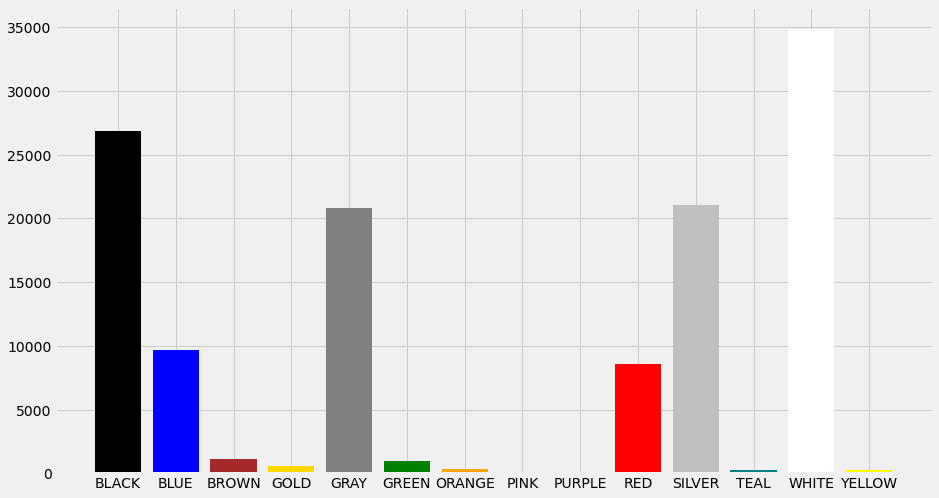

In [50]:
fig = plt.figure(figsize =(14, 8))
color = df_color['color'].tolist()
count = df_color['count'].tolist()
plt.bar(color, count, color = color)

In [51]:
df_rare = dfcal[(dfcal.color == 'BROWN')|(dfcal.color == 'GREEN')|(dfcal.color == 'GOLD')|(dfcal.color == 'ORANGE')|
                   (dfcal.color == 'TEAL')|(dfcal.color == 'YELLOW')|(dfcal.color == 'PURPLE')|(dfcal.color == 'PINK')]
df_not_rare = dfcal[(dfcal.color == 'WHITE')|(dfcal.color == 'BLACK')|(dfcal.color == 'SILVER')|
                    (dfcal.color == 'GRAY')|(dfcal.color == 'BLUE')|(dfcal.color == 'RED')]

In [52]:
df_rare.describe()

,zip,engine_displacement,horsepower,mileage,price,year,log_price,log_mileage
count,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000
mean,93278.600437,2925.818777,232.169214,71565.942413,22197.455240,2012.969159,9.658953,10.719763
std,1724.277094,1292.682691,99.347589,54429.112068,32088.270065,5.893715,0.758519,1.247845
min,90001.000000,700.000000,70.000000,54.000000,999.000000,1981.000000,6.906755,3.988984
25%,91950.000000,2000.000000,164.000000,27359.000000,8999.000000,2009.000000,9.104869,10.216801
50%,92870.000000,2500.000000,203.000000,59322.000000,15988.000000,2015.000000,9.679594,10.990735
75%,95051.000000,3500.000000,285.000000,108814.000000,24961.250000,2017.000000,10.125080,11.597395
max,96130.000000,8300.000000,797.000000,347097.000000,738900.000000,2021.000000,13.512918,12.757360


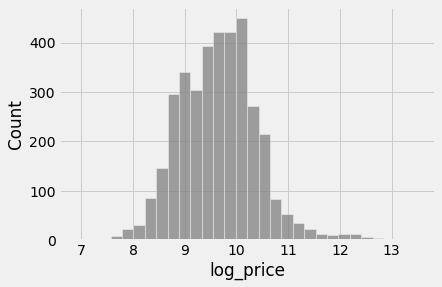

In [158]:
sns.histplot(df_rare['log_price'], bins = 30, color = 'grey')
plt.show()

In [53]:
df_not_rare.describe()

,zip,engine_displacement,horsepower,mileage,price,year,log_price,log_mileage
count,121901.000000,121901.000000,121901.000000,121901.000000,1.219010e+05,121901.000000,121901.000000,121901.000000
mean,93061.960410,2800.972921,237.567214,47674.774891,2.445803e+04,2016.325001,9.935781,10.316827
std,1685.323787,1216.491562,88.948498,39540.486144,2.134458e+04,3.596950,0.562271,1.267838
min,90001.000000,700.000000,69.000000,51.000000,1.490000e+03,1981.000000,7.306531,3.931826
25%,91784.000000,2000.000000,170.000000,22203.000000,1.498700e+04,2016.000000,9.614938,10.007983
50%,92683.000000,2400.000000,228.000000,35289.000000,1.999900e+04,2017.000000,9.903438,10.471327
75%,94565.000000,3500.000000,290.000000,63660.000000,2.959500e+04,2019.000000,10.295361,11.061312
max,96150.000000,8300.000000,1001.000000,389009.000000,2.749950e+06,2021.000000,14.827093,12.871358


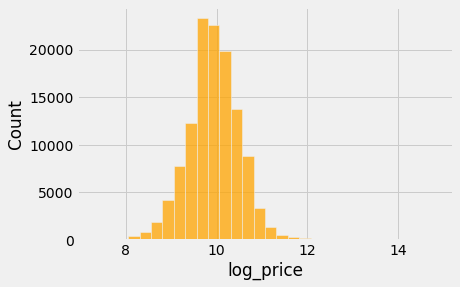

In [161]:
sns.histplot(df_not_rare['log_price'], bins = 30, color = 'orange')
plt.show()

We have split the data into 2 groups and since they are relatively normal distributed we will perform a t test on them.

In [54]:
price_not_rare = df_rare['log_price']
price_rare = df_not_rare['log_price']

t_val, p_val = ttest_ind(a = price_not_rare, b = price_rare)
t_val, p_val

(-29.018807456883636, 1.5590547063481875e-184)

The t test on common and rare color gives a t value of -29.018. It means that the average price of rare color cars are 29 standard deviation cheaper than cars of common colors. However, this could be misleading and have bias. Let us perform the t test again on specific model that are top selling in their body type.

Let us define a function to apply it on the different models.

In [238]:
t_result = pd.DataFrame(columns = ['Body_type','Model', 't_value', 'p_value'])
count = 0

In [239]:
def difftest(input1, input2):
    global count
    global t_result
    if count == 5:
        count = 0
    count = count + 1
    
    df_model= dfcal[(dfcal.model == input1)& (dfcal.type == input2)]
    df_rare_color= df_model[(df_model.color == 'BROWN')|(df_model.color == 'GREEN')|
                            (df_model.color == 'GOLD')|(df_model.color == 'ORANGE')|
                            (df_model.color == 'TEAL')|(df_model.color == 'YELLOW')|
                            (df_model.color == 'PURPLE')|(df_model.color == 'PINK')]
    df_not_rare_color = df_model[(df_model.color == 'WHITE')|(df_model.color == 'BLACK')|
                                (df_model.color == 'SILVER')|(df_model.color == 'GRAY')|
                                (df_model.color == 'BLUE')|(df_model.color == 'RED')]
    price_rare = df_not_rare_color['log_price']
    price_not_rare = df_rare_color['log_price']

    t_val, p_val = ttest_ind(a = price_not_rare, b = price_rare)
    print('t value for', input1, input2,'is',round(t_val, 2),'.','p value for', input1, input2,'is', round(p_val, 2))
    
    dict = {'Body_type': input2,'t_value':t_val,'Model':count, 'p_value':p_val}
    t_result = t_result.append(dict, ignore_index = True)

Since the t-test result for the top 5 most selling models in 9 different body types has already taken a siginificant portion of our report, the histograms of those dataset is not included in our report before performing the t-test. However, since we had already performed log transformation in the price and the overall shape of the data is normally distributed, it should not be a big problem.

In [240]:
difftest('Mustang', 'Coupe')
difftest('Challenger', 'Coupe')
difftest('Camaro', 'Coupe')
difftest('Civic Coupe', 'Coupe')
difftest('911', 'Coupe')

t value for Mustang Coupe is -0.15 . p value for Mustang Coupe is 0.88
t value for Challenger Coupe is 1.83 . p value for Challenger Coupe is 0.07
t value for Camaro Coupe is -1.29 . p value for Camaro Coupe is 0.2
t value for Civic Coupe Coupe is 0.55 . p value for Civic Coupe Coupe is 0.58
t value for 911 Coupe is 4.68 . p value for 911 Coupe is 0.0


In [241]:
difftest('Corolla', 'Sedan')
difftest('Civic', 'Sedan')
difftest('Camry', 'Sedan')
difftest('Accord', 'Sedan')
difftest('Sentra', 'Sedan')

t value for Corolla Sedan is -5.03 . p value for Corolla Sedan is 0.0
t value for Civic Sedan is -7.78 . p value for Civic Sedan is 0.0
t value for Camry Sedan is -8.73 . p value for Camry Sedan is 0.0
t value for Accord Sedan is -5.66 . p value for Accord Sedan is 0.0
t value for Sentra Sedan is -5.21 . p value for Sentra Sedan is 0.0


In [242]:
difftest('Explorer', 'SUV / Crossover')
difftest('Rogue', 'SUV / Crossover')
difftest('Escape', 'SUV / Crossover')
difftest('RAV4', 'SUV / Crossover')
difftest('Wrangler Unlimited', 'SUV / Crossover')

t value for Explorer SUV / Crossover is -6.05 . p value for Explorer SUV / Crossover is 0.0
t value for Rogue SUV / Crossover is -2.2 . p value for Rogue SUV / Crossover is 0.03
t value for Escape SUV / Crossover is -1.42 . p value for Escape SUV / Crossover is 0.16
t value for RAV4 SUV / Crossover is -2.73 . p value for RAV4 SUV / Crossover is 0.01
t value for Wrangler Unlimited SUV / Crossover is -3.57 . p value for Wrangler Unlimited SUV / Crossover is 0.0


In [243]:
difftest('Grand Caravan', 'Minivan')
difftest('Sienna', 'Minivan')
difftest('Odyssey', 'Minivan')
difftest('Pacifica', 'Minivan')
difftest('Town & Country', 'Minivan')

t value for Grand Caravan Minivan is -8.58 . p value for Grand Caravan Minivan is 0.0
t value for Sienna Minivan is -10.13 . p value for Sienna Minivan is 0.0
t value for Odyssey Minivan is -2.69 . p value for Odyssey Minivan is 0.01
t value for Pacifica Minivan is -0.6 . p value for Pacifica Minivan is 0.55
t value for Town & Country Minivan is 0.77 . p value for Town & Country Minivan is 0.44


In [244]:
difftest('F-150', 'Pickup Truck')
difftest('Silverado 1500', 'Pickup Truck')
difftest('1500', 'Pickup Truck')
difftest('Tacoma', 'Pickup Truck')
difftest('Sierra 1500', 'Pickup Truck')

t value for F-150 Pickup Truck is -4.5 . p value for F-150 Pickup Truck is 0.0
t value for Silverado 1500 Pickup Truck is -6.2 . p value for Silverado 1500 Pickup Truck is 0.0
t value for 1500 Pickup Truck is -3.33 . p value for 1500 Pickup Truck is 0.0
t value for Tacoma Pickup Truck is -3.35 . p value for Tacoma Pickup Truck is 0.0
t value for Sierra 1500 Pickup Truck is -1.62 . p value for Sierra 1500 Pickup Truck is 0.11


In [245]:
difftest('Prius', 'Hatchback')
difftest('Volt', 'Hatchback')
difftest('Cooper', 'Hatchback')
difftest('Fit', 'Hatchback')
difftest('MAZDA3', 'Hatchback')

t value for Prius Hatchback is -8.96 . p value for Prius Hatchback is 0.0
t value for Volt Hatchback is -1.56 . p value for Volt Hatchback is 0.12
t value for Cooper Hatchback is -2.15 . p value for Cooper Hatchback is 0.03
t value for Fit Hatchback is -1.1 . p value for Fit Hatchback is 0.27
t value for MAZDA3 Hatchback is -0.58 . p value for MAZDA3 Hatchback is 0.56


In [246]:
difftest('Outback', 'Wagon')
difftest('Soul', 'Wagon')
difftest('i3', 'Wagon')
difftest('CT Hybrid', 'Wagon')
difftest('C-Max Energi', 'Wagon')

t value for Outback Wagon is -0.77 . p value for Outback Wagon is 0.44
t value for Soul Wagon is -2.82 . p value for Soul Wagon is 0.0
t value for i3 Wagon is -2.53 . p value for i3 Wagon is 0.01
t value for CT Hybrid Wagon is -0.67 . p value for CT Hybrid Wagon is 0.5
t value for C-Max Energi Wagon is -1.37 . p value for C-Max Energi Wagon is 0.17


In [247]:
difftest('Mustang', 'Convertible')
difftest('Camaro', 'Convertible')
difftest('911', 'Convertible')
difftest('SL-Class', 'Convertible')
difftest('C-Class', 'Convertible')

t value for Mustang Convertible is -2.87 . p value for Mustang Convertible is 0.0
t value for Camaro Convertible is -0.7 . p value for Camaro Convertible is 0.48
t value for 911 Convertible is 1.09 . p value for 911 Convertible is 0.28
t value for SL-Class Convertible is -3.12 . p value for SL-Class Convertible is 0.0
t value for C-Class Convertible is nan . p value for C-Class Convertible is nan


In [248]:
difftest('Express', 'Van')
difftest('Transit Passenger', 'Van')
difftest('Transit Connect', 'Van')
difftest('Transit Cargo', 'Van')
difftest('Express Cargo', 'Van')

t value for Express Van is -3.18 . p value for Express Van is 0.0
t value for Transit Passenger Van is nan . p value for Transit Passenger Van is nan
t value for Transit Connect Van is -1.21 . p value for Transit Connect Van is 0.23
t value for Transit Cargo Van is -0.86 . p value for Transit Cargo Van is 0.39
t value for Express Cargo Van is nan . p value for Express Cargo Van is nan


C:\Users\billx\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\billx\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


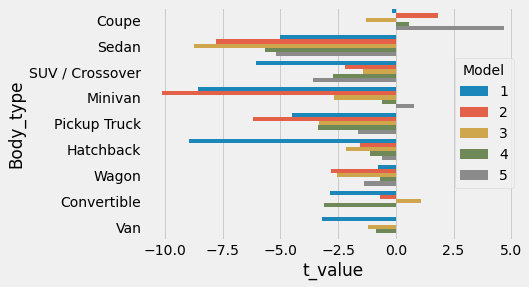

In [252]:
ax = sns.barplot(x="t_value",y="Body_type", hue = "Model", data=t_result)

The last two categories with car type of convertible and van are returning some null values because the data set is not large enough for them to perform t test. It does not have enough degree of freedom.

With these data, we can say that for few of the cars the color actually does not make a statistically significant difference. 

The other models that have statisitical significant differences are often negative ones. Hence a car with rare colors are cheaper than the car of the same model but common colors. This trend is more extreme with body type of sedan and minivan. Moreover, even if there is no statistical significant difference in some of the model, they often shows a mild negative trend.

The only two body type that shows the opposite are the coupe and convertibles, these cars are often more expensive if their color is rare compare to common ones. Moreover, on some more extreme cars like the Porsche 911 for example, the average price of rare color is 4.68 times standard deviation away from the average price of the common color ones.

# Ethics & Privacy

We gathered our data from public sources. We respect the intellectual property of the data and we are sure that they are allowed to be used in academic, research, and individual experimentation. 

Also, as we don’t use personally identifiable information in our analysis, we excluded personally identifiable information such as cars' VIN numbers from our dataset before our analysis to protect privacy.

# Conclusion & Discussion

With OLS regression, we find that every color affect the same model of car differently, same color affect different color differently, and many color are irrelevant to the price of the car. Moreover, when we split the color into two group of rare and common color, the trend shows that the price of rare color cars are usually lower than the price of common color cars. With only two exception of body type: coupe and convertible. These two categories of car could have a higher price if their color is rare. The finding actucally support our hypothesise that the rare color cars has a lower price than common color cars, except in coupe and convertibles.

There is also some limilation of our project. First of all, this data is collected in September 2020 from a used car website call Cargurus. This dataset might be biased because it only has the used car data that is availiable at that time. For example, the used car's price in our dataset might be higher than the actual market price since our dataset only contains many used cars that has been in market for a long time and has not yet been sold. 


Also, due to the time constains, we only did linear regression on some top selling models. However, color might have a some impacts on the models with less popularity that we did not find out.


Another limitation is the size of our sample, we are not able to perform on some of the models because of their small sample size.

# Team Contributions

Meijiang Shen - Found the dataset, Data Cleaning, EDA, Inferential Data Analysis, PPT for video recording

Yunze Xie - Coming up with the idea, Data Cleaning, EDA, Inferential Data Analysis, Video Recording

Hongfei Lyu - Back ground research, Data Cleaning, EDA, Inferential Data Analysis, PPT for video recording

Zijian Sheng - Back ground research, Data Cleaning, EDA, Inferential Data Analysis, PPT for video recording